# 0. Introduction 
This notebook demonstrates the techniques to handle the class imbalance problem 
* <b>Stratification</b> 
* <b>Upsampling & Undersampling</b> 

# 1. Read Data & Preprocessing

In [1]:
import numpy as np 
import pandas as pd 

### Download Data set [here](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

In [2]:
# load the dataset
df = pd.read_csv('../../DATA/kaggle/default-cc-fraud/UCI_Credit_Card.csv')


In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

### Check missing Values

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<b>There is no missing values</b>

## Check Label Distribution

In [6]:
df['default.payment.next.month'].unique()

array([1, 0])

In [7]:
dist_target = df['default.payment.next.month'].sum() / len(df['default.payment.next.month'])
print(dist_target)

0.2212


(array([23364.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6636.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

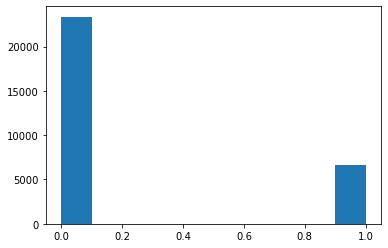

In [8]:
import matplotlib.pyplot as plt 
plt.hist(df['default.payment.next.month'])

<b>Data have imbalance problem. The data is binary, only 0 or 1 label. But only 22% of the data belong to the 1 and the rest belong to 0.</b>

In [9]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

## Features Selection 

The data have imbalance data problem. We will take care  of this problem later. 


First, we look for features that has <b>high</b> corretation with the label (payment next month), so we use <b>matrix correlation.</b>

In [10]:
corr = df.corr()
corr

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


### Plot Correlation Matrix as Heatmap

<AxesSubplot:>

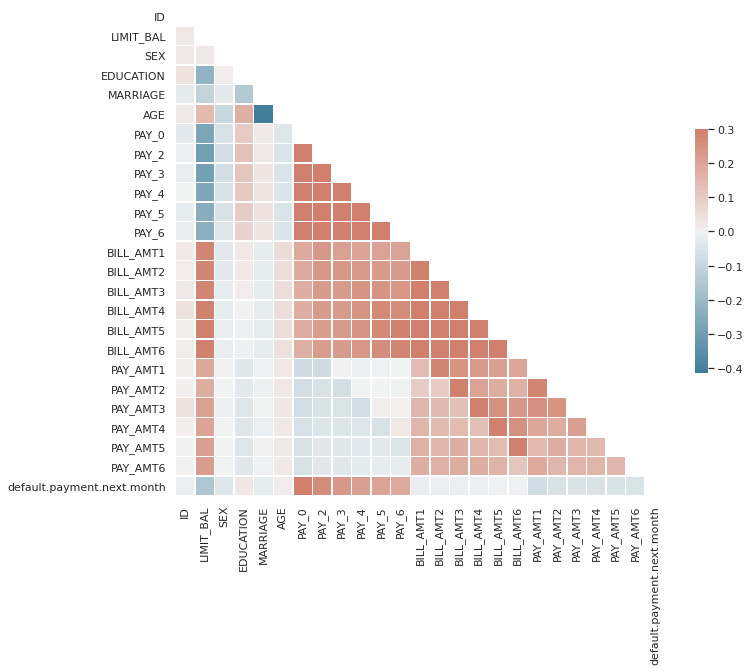

In [11]:
import seaborn as sns
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
corr_target = abs(corr['default.payment.next.month'])

In [13]:
type(corr_target)

pandas.core.series.Series

In [14]:
corr_target.sort_values()

BILL_AMT6                     0.005372
BILL_AMT5                     0.006760
BILL_AMT4                     0.010156
AGE                           0.013890
ID                            0.013952
BILL_AMT3                     0.014076
BILL_AMT2                     0.014193
BILL_AMT1                     0.019644
MARRIAGE                      0.024339
EDUCATION                     0.028006
SEX                           0.039961
PAY_AMT6                      0.053183
PAY_AMT5                      0.055124
PAY_AMT3                      0.056250
PAY_AMT4                      0.056827
PAY_AMT2                      0.058579
PAY_AMT1                      0.072929
LIMIT_BAL                     0.153520
PAY_6                         0.186866
PAY_5                         0.204149
PAY_4                         0.216614
PAY_3                         0.235253
PAY_2                         0.263551
PAY_0                         0.324794
default.payment.next.month    1.000000
Name: default.payment.nex

### Select High Correlation feature 
select all features with correlation more than <b>0.01</b>. (my own threshold) 

In [15]:
features_colums = corr_target[corr_target>0.01]
features_colums.index

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month'],
      dtype='object')

In [16]:
features_ = df[features_colums.index]
labels = features_['default.payment.next.month']
features = features_.drop(['default.payment.next.month'],axis=1)
features.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,3913.0,3102.0,689.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,1725.0,2682.0,3272.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,29239.0,14027.0,13559.0,14331.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,46990.0,48233.0,49291.0,28314.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,8617.0,5670.0,35835.0,20940.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [17]:
labels.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

## Split Data into Train and Test data

### Try with Stratify

If you are not familiar wth stratification, you may check this [post](https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e)

In [18]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, labels,stratify=labels.values, test_size=0.2)

In [19]:
print('proportion on Training Data :  {}'.format(y_train1.sum() / len(y_train1)))
print('proportion on Training Data :  {}'.format(y_test1.sum() / len(y_test1)))


proportion on Training Data :  0.22120833333333334
proportion on Training Data :  0.22116666666666668


We got the <b>same portion</b> for training and testing! 

In [20]:
X_train1.count()

ID           24000
LIMIT_BAL    24000
SEX          24000
EDUCATION    24000
MARRIAGE     24000
AGE          24000
PAY_0        24000
PAY_2        24000
PAY_3        24000
PAY_4        24000
PAY_5        24000
PAY_6        24000
BILL_AMT1    24000
BILL_AMT2    24000
BILL_AMT3    24000
BILL_AMT4    24000
PAY_AMT1     24000
PAY_AMT2     24000
PAY_AMT3     24000
PAY_AMT4     24000
PAY_AMT5     24000
PAY_AMT6     24000
dtype: int64

In [21]:
y_train1.count()

24000

(array([18691.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5309.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

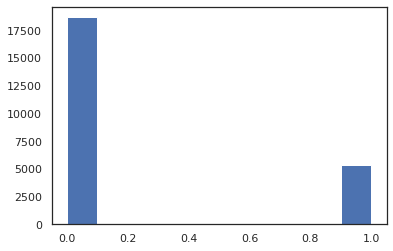

In [22]:
plt.hist(y_train1)

<b> Only stratify </b> is not enough!

### Upsampling with SMOTE 
SMOTE = Synthetic Minority Over-sampling Technique 
If you are not familiar with SMOTE, you may check this [reference](https://arxiv.org/abs/1106.1813).

In [23]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print(Counter(labels))
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(features, labels)
# summarize the new class distribution
counter = Counter(y_sm)
print(counter)

Counter({0: 23364, 1: 6636})
Counter({1: 23364, 0: 23364})


### Combine SMOTE with Statify

In [24]:
# create training and testing vars
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,stratify=y_sm, test_size=0.2)

(array([18691.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18691.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

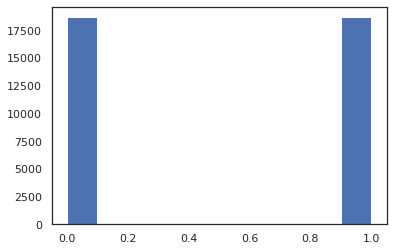

In [25]:
plt.hist(y_train_sm)

In [26]:
print('proportion on Training Data :  {}'.format(y_train_sm.sum() / len(y_train_sm)))
print('proportion on Training Data :  {}'.format(y_test_sm.sum() / len(y_test_sm)))

proportion on Training Data :  0.5
proportion on Training Data :  0.5


# 2 . Build Model 
For simplifity, we will build Decission Tree Classifier 

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer

def decisiontree(X_train,y_train,X_test,y_test):
    classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
    # training the classifier
    classifier.fit(X_train, y_train)
    # do our predictions on the test
    predictions = classifier.predict(X_test)
    # see how good we did on the test
    prob = classifier.predict(X_test)
    return accuracy_score(y_true = y_test, y_pred = predictions), predictions, prob

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def classification_performance(y_true,y_pred):
    
    print("Confusion Matrix\n")
    print(confusion_matrix(y_true, y_pred))
    # Recall
    print("\nRecall Score\n")
    print(recall_score(y_true, y_pred, average=None))
    # Precision
    print("\nPrecision Score\n")
    print(precision_score(y_true, y_pred, average=None))
    # Method 1: sklearn
    print("\n F1 Score\n")
    print(f1_score(y_true, y_pred, average=None))
    

In [28]:
score,predictions_sm, prob1 = decisiontree(X_train_sm,y_train_sm,X_test_sm,y_test_sm)

print("Decision Tree Prediction Score : ", score )
print("Classification Performance \n")

classification_performance(y_test_sm,predictions_sm)

Decision Tree Prediction Score :  0.7567943505242885
Classification Performance 

Confusion Matrix

[[3710  963]
 [1310 3363]]

Recall Score

[0.79392253 0.71966617]

Precision Score

[0.73904382 0.77739251]

 F1 Score

[0.76550088 0.74741638]


## Combining SMOTE with random Under-Sampling



In [29]:
from imblearn.pipeline import Pipeline
#from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_sm2, y_sm2 = pipeline.fit_resample(features, labels)

(array([23363.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18691.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

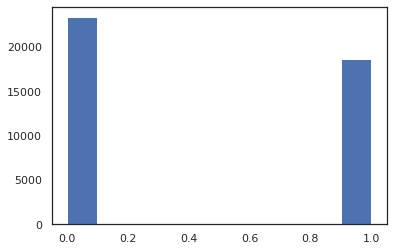

In [30]:
plt.hist(y_sm2)

In [31]:
y_sm2.sum() / len(y_sm2)

0.444452370761402

In [32]:
X_sm2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10953,340000.0,2,1,1,41,0,0,0,0,...,325371.0,326867.0,322454.0,275928.0,25034.0,11000.0,10000.0,10000.0,10000.0,10000.0
1,26594,380000.0,1,1,2,32,0,0,0,0,...,387851.0,349973.0,689643.0,334456.0,13070.0,13000.0,26000.0,20095.0,11000.0,11000.0
2,26672,150000.0,1,1,1,28,0,0,0,0,...,145728.0,145240.0,148755.0,133414.0,5002.0,6009.0,3259.0,149.0,1866.0,0.0
3,9187,100000.0,1,2,1,35,-1,-1,-1,-1,...,1131.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,502.0,80.0
4,10814,290000.0,2,1,2,29,0,0,0,0,...,41435.0,30229.0,9020.0,-77.0,1690.0,3000.0,0.0,8200.0,205000.0,6000.0


### Move the features into the same Scale

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sm2 = sc.fit_transform(X_sm2)

In [38]:
X_sm2[:5,:5]

array([[-0.46821039,  1.45122494,  0.95156847, -1.05302921, -0.91505272],
       [ 1.37374251,  1.76728269, -1.05089653, -1.05302921,  1.01860021],
       [ 1.38292813, -0.0500494 , -1.05089653, -1.05302921, -0.91505272],
       [-0.67618232, -0.44512159, -1.05089653,  0.28858768, -0.91505272],
       [-0.48457965,  1.05615274,  0.95156847, -1.05302921,  1.01860021]])

In [39]:
# create training and testing vars
X_train_sm2, X_test_sm2, y_train_sm2, y_test_sm2 = train_test_split(X_sm2, y_sm2,stratify=y_sm2, test_size=0.2)

In [40]:
print('proportion on Training Data :  {}'.format(y_train_sm2.sum() / len(y_train_sm2)))
print('proportion on Training Data :  {}'.format(y_test_sm2.sum() / len(y_test_sm2)))

proportion on Training Data :  0.4444609577029397
proportion on Training Data :  0.4444180240161693


In [38]:
score,predictions_sm2,prob2 = decisiontree(X_train_sm2,y_train_sm2,X_test_sm2,y_test_sm2)

print("Decision Tree Prediction Score : ", score )
print("Classification Performance \n")

classification_performance(y_test_sm2,predictions_sm2)

Decision Tree Prediction Score :  0.7620972535964808
Classification Performance 

Confusion Matrix

[[3821  852]
 [1149 2589]]

Recall Score

[0.81767601 0.69261637]

Precision Score

[0.76881288 0.75239756]

 F1 Score

[0.79249196 0.72127037]


just slightly imporve from <b>0.75</b> to <b>0.76</b>

## Build Random Forest and Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#rfc=RandomForestClassifier(random_state=42)

In [42]:
#param_grid = { 
#    'n_estimators': [100, 200],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [8,12,16,20,24,32,40],
#    'criterion' :['gini', 'entropy']
#}

In [43]:
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train_sm2, y_train_sm2)

In [44]:
#CV_rfc.best_params_

In [57]:
rfc1=RandomForestClassifier(random_state=0, max_features=5, n_estimators= 200, max_depth=40, criterion='gini')
rfc1.fit(X_train_sm2, y_train_sm2)

RandomForestClassifier(max_depth=40, max_features=5, n_estimators=200,
                       random_state=0)

In [58]:
pred=rfc1.predict(X_test_sm2)

In [59]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_sm2,pred))

Accuracy for Random Forest on CV data:  0.8330757341576507


With higher complexity Random Forest accuracy improve quite significant, from <b>0.76</b> to <b>0.83</b>